<a href="https://colab.research.google.com/github/Amcalstrings/Programming-Language-Popularity-Analysis-with-Pandas/blob/main/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Statements

In [1]:
import pandas
import matplotlib.pyplot as plt



## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pandas.read_csv("/content/data/QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)



**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()

df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
total_post = df.groupby("TAG").sum() # total number of post per language

highest_total_post = total_post.idxmax()

highest_total_post

<ipython-input-7-96e0585642c9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_post = df.groupby("TAG").sum() # total number of post per language


POSTS    javascript
dtype: object

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df["DATE"][1]

'2008-08-01 00:00:00'

In [ ]:
df["DATE"] = pandas.to_datetime(df["DATE"]) # converting the whole date column to pandas date format

df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [9]:
# test_df = pandas.DataFrame(
#     {
#         'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
#         'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
#         'Power': [100, 80, 25, 50, 99, 75, 5, 30],
#     }
# )
# pivoted_test_df = test_df.pivot(index='Age', columns='Actor', values='Power')

# print(test_df)

# pivoted_test_df
df["DATE"] = pandas.to_datetime(df["DATE"])

reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

reshaped_df.fillna(value=0, inplace=True)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
reshaped_df.shape

(145, 14)

In [12]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [11]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [10]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

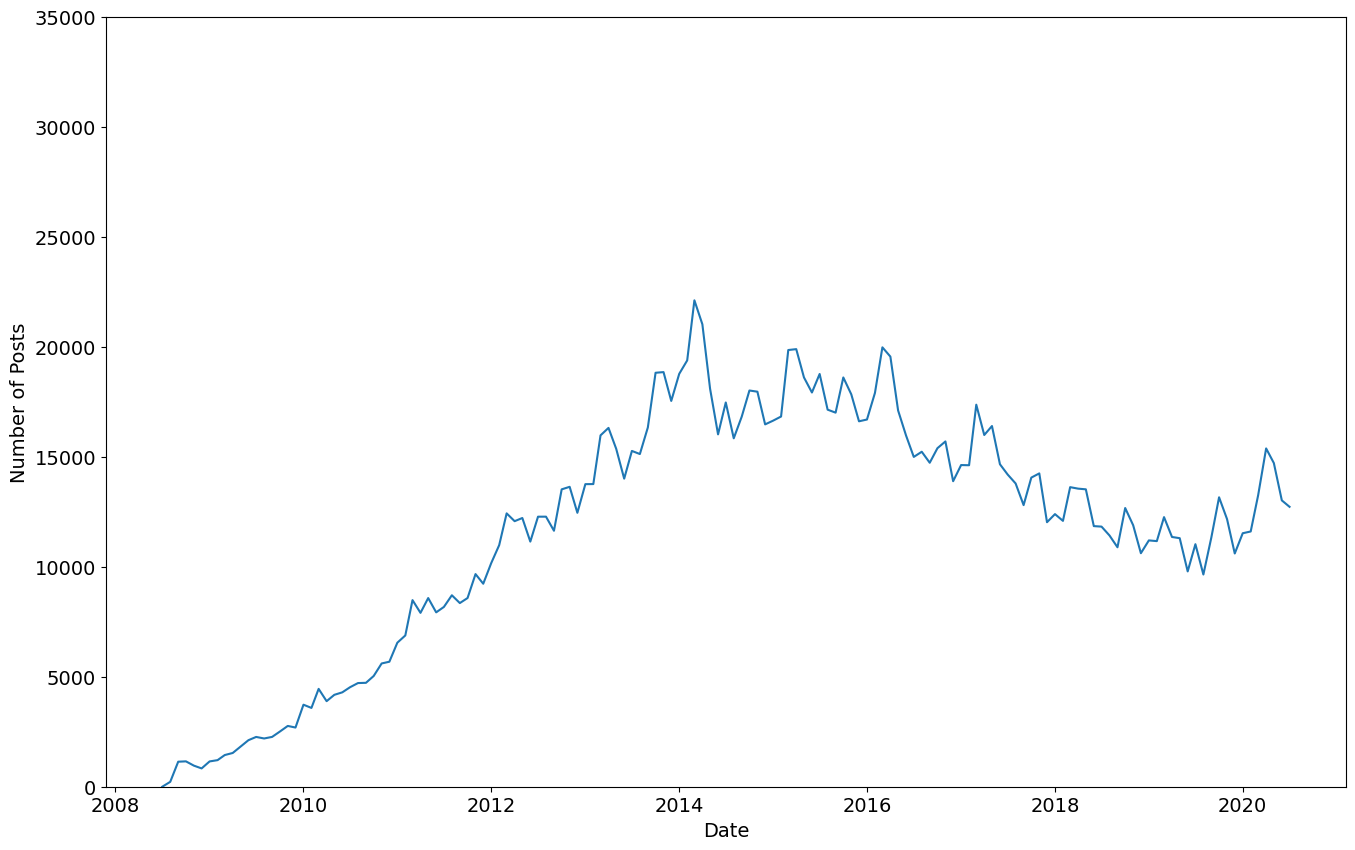

In [ ]:
plt.figure(figsize=(16, 10)) # increase the width and height
plt.xticks(fontsize=14) # increase the fontsize of the x axis
plt.yticks(fontsize=14) # increase the fontsize of the y axis
plt.xlabel('Date', fontsize=14) # set the label for the x axis
plt.ylabel('Number of Posts', fontsize=14) # set the label for the y axis
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

In [ ]:
x = reshaped_df.index
y1 = reshaped_df['java']
y2 = reshaped_df['python']
plt.figure(figsize=(16, 10)) # increase the width and height
plt.xticks(fontsize=14) # increase the fontsize of the x axis
plt.yticks(fontsize=14) # increase the fontsize of the y axis
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(x, y1, y2)

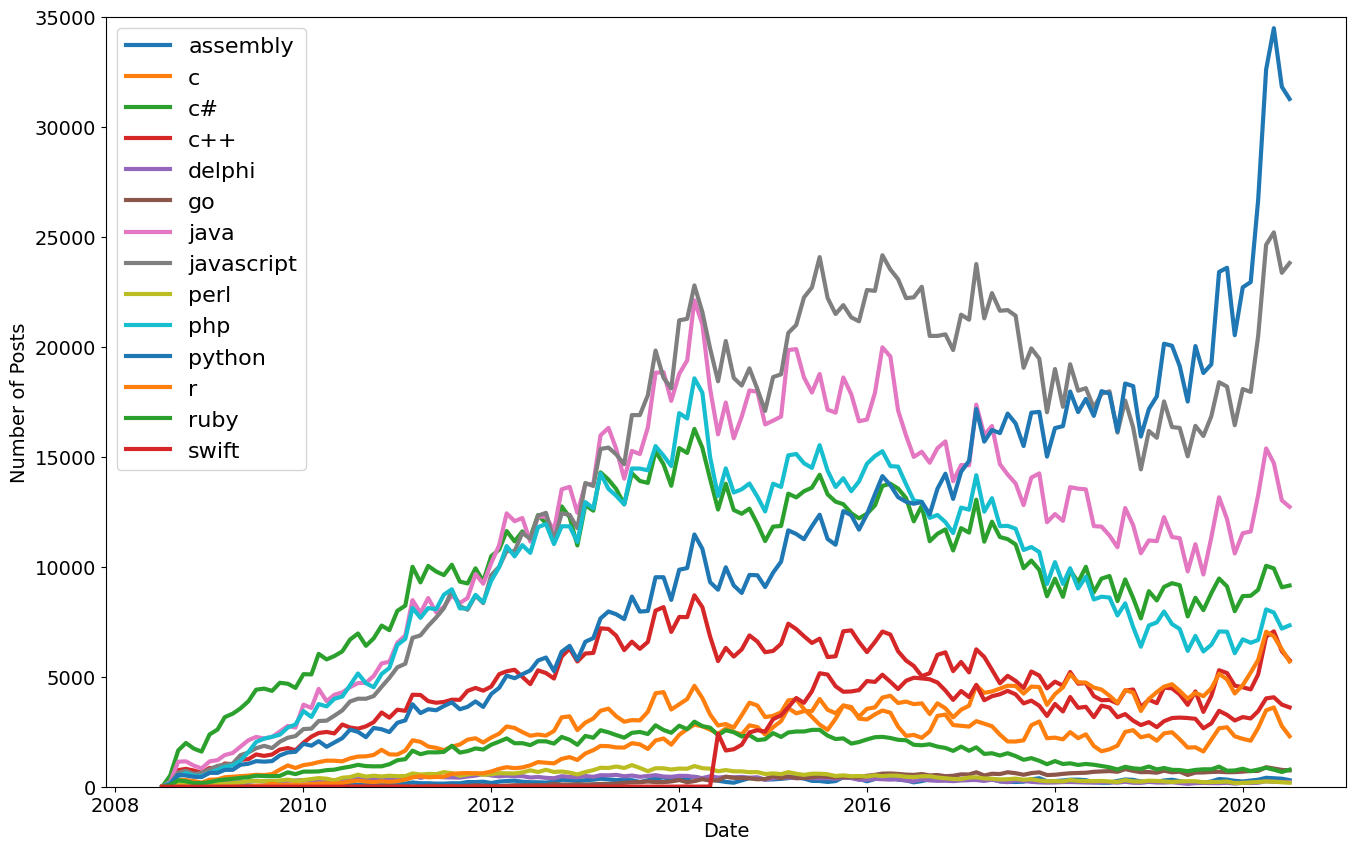

In [ ]:
# Plotting for all the programming languages
x = reshaped_df.index
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for language in reshaped_df.columns:
  plt.plot(x, reshaped_df[language], label=reshaped_df[language].name, linewidth=3)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

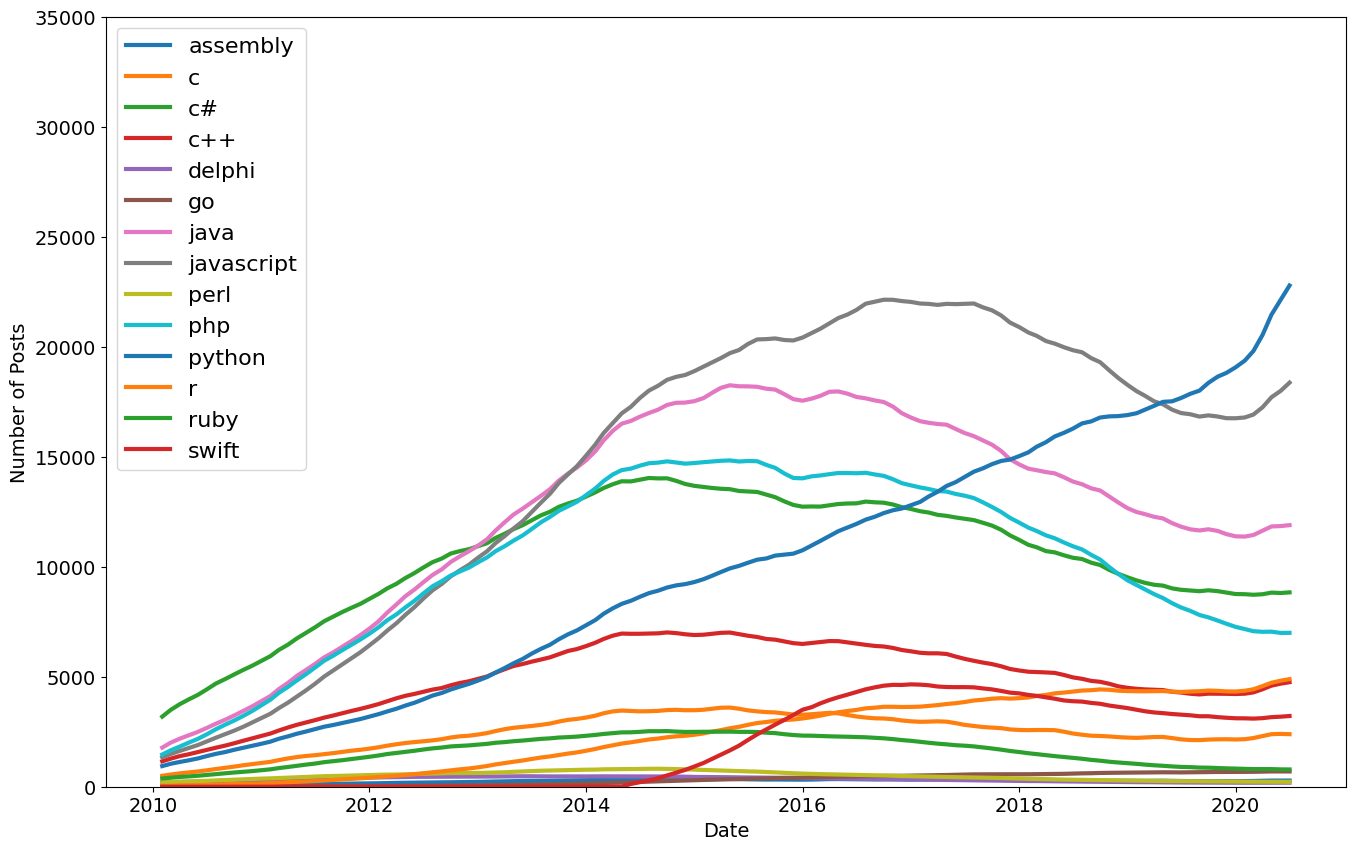

In [ ]:
# Smoothing out the time data series to reduce data set of noise

roll_data = reshaped_df.rolling(window=12).mean()
x = roll_data.index
plt.figure(figsize=(16, 10)) # increase the width and height
plt.xticks(fontsize=14) # increase the fontsize of the x axis
plt.yticks(fontsize=14) # increase the fontsize of the y axis
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for language in reshaped_df.columns:
  plt.plot(x, roll_data[language], label=roll_data[language].name, linewidth=3)
plt.legend(fontsize=16)